In [85]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [86]:
df = pd.read_csv("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv",encoding='ISO-8859-1',sep=';')
df

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [87]:
df_sub = pd.concat([df["Ngày"], df["3"], df["4"]], axis=1)
print(df_sub)

           Ngày       3       4
0    01/01/2021   964.4   964.4
1    01/02/2021  1019.7  1019.7
2    01/03/2021   988.4   988.4
3    01/04/2021  1002.0  1002.0
4    01/05/2021  1061.5  1061.5
..          ...     ...     ...
360  27/12/2021  1002.0  1002.0
361  28/12/2021  1002.0  1002.0
362  29/12/2021  1061.5  1061.5
363  30/12/2021  1022.6  1022.6
364  31/12/2021  1022.6  1022.6

[365 rows x 3 columns]


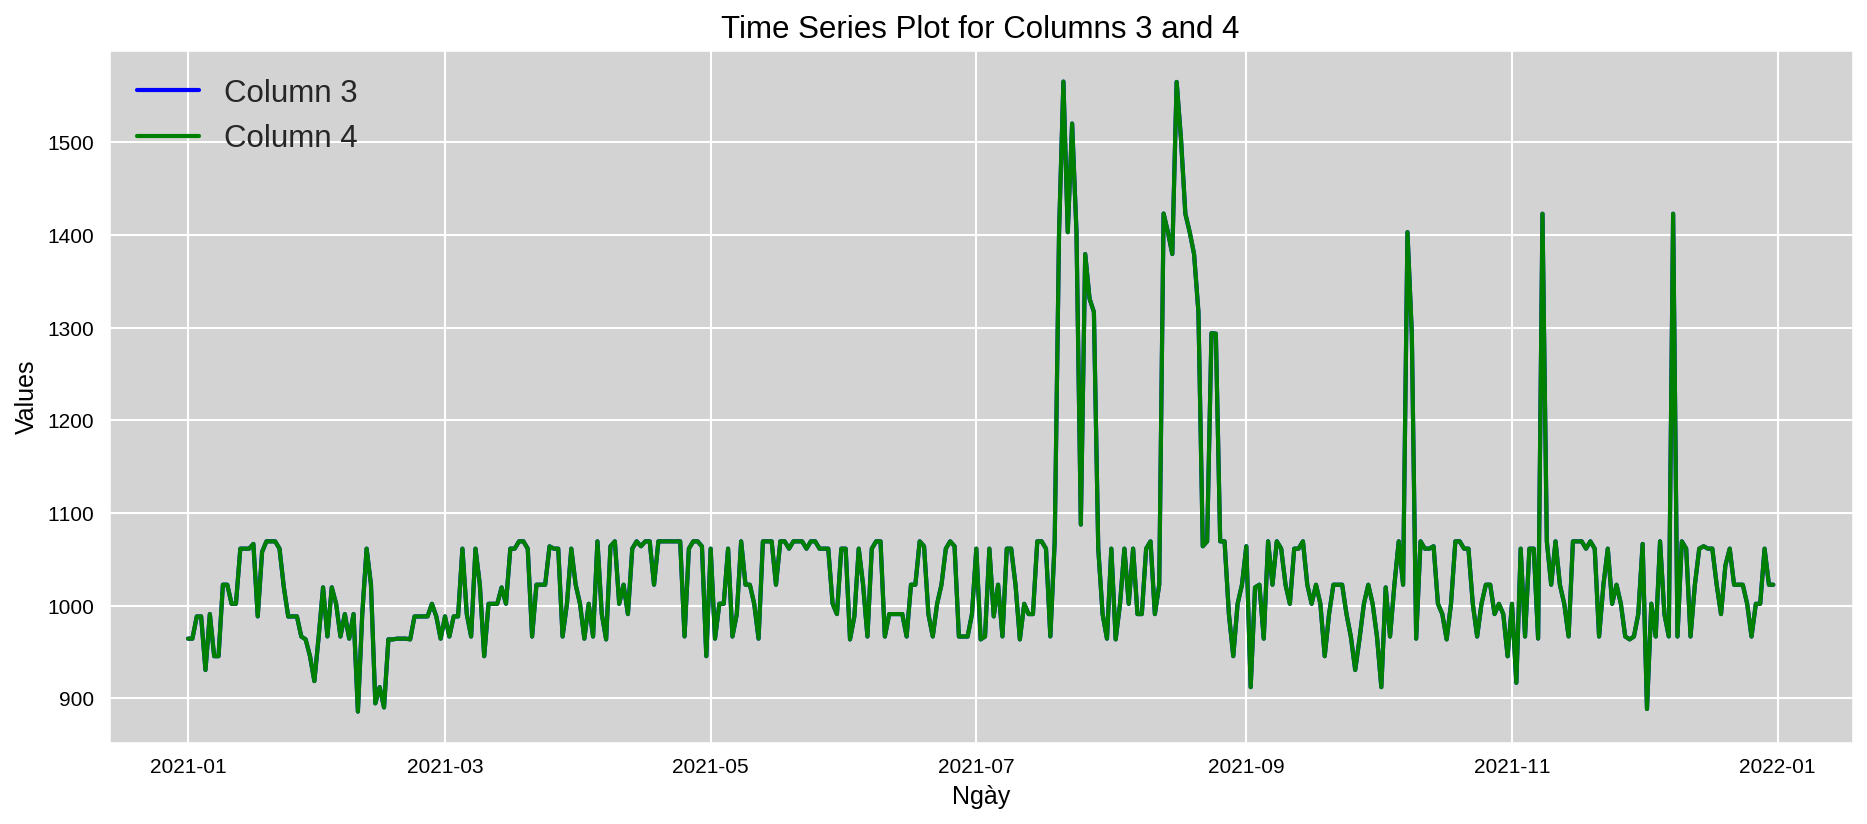

In [110]:
# Ensure that 'Ngày' column is converted to datetime if not already
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Plotting time series for columns 3 and 4
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = '#d3d3d3'  # Light gray color
plt.rc('axes', edgecolor='white')

# Plot for column 3
plt.plot(df['Ngày'], df['3'], color='blue', lw=2, label='Column 3')

# Plot for column 4
plt.plot(df['Ngày'], df['4'], color='green', lw=2, label='Column 4')

plt.title('Time Series Plot for Columns 3 and 4', fontsize=15, color='black')
plt.xlabel('Ngày', fontsize=12, color='black')
plt.ylabel('Values', fontsize=12, color='black')
plt.legend(loc='upper left', prop={'size': 15})
plt.grid(color='white')

# Setting the tick colors
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.show()


In [88]:
feats= ['3','4']

In [89]:
transformer = StandardScaler()

# Trích xuất các cột trong feats từ DataFrame và chuẩn hóa chúng
X = transformer.fit_transform(df[feats])

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

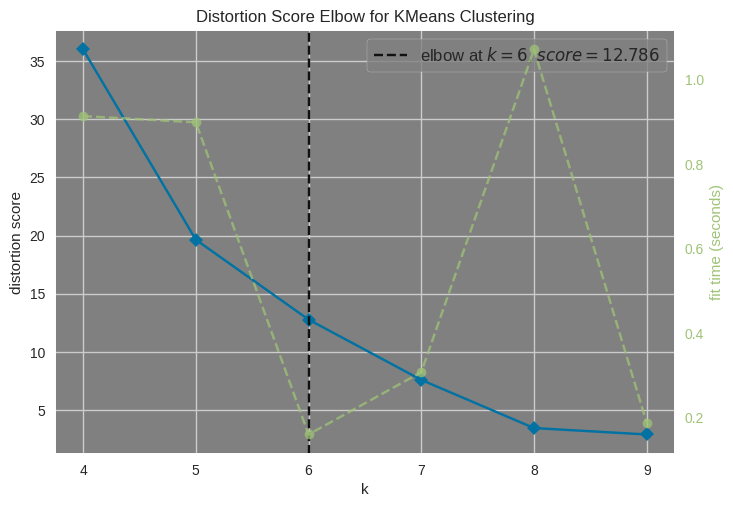

In [90]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,10))
Elbow_M.fit(X)
Elbow_M.show();

In [91]:
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)

#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [92]:
pp=BGM.predict_proba(X)# Calcualting the probabilities of each prediction
df_new=pd.DataFrame(X,columns=feats)
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp # creating new dataframe columns of probabilites
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)

train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [93]:
from sklearn.model_selection import StratifiedKFold
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7}

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)

    model = lgb.train(params = params_lgb,
                train_set = tr_dataset,
                valid_sets =  vl_dataset,
                num_boost_round = 5000,
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])

    model_list.append(model)

[200]	valid_0's multi_logloss: 0.000151726
[400]	valid_0's multi_logloss: 0.000151726
[200]	valid_0's multi_logloss: 0.000153686
[400]	valid_0's multi_logloss: 0.000153686
[200]	valid_0's multi_logloss: 0.000155722
[400]	valid_0's multi_logloss: 0.000155722
[200]	valid_0's multi_logloss: 0.000156754
[400]	valid_0's multi_logloss: 0.000156754
[200]	valid_0's multi_logloss: 0.000153261
[400]	valid_0's multi_logloss: 0.000153261
[200]	valid_0's multi_logloss: 0.00015524
[400]	valid_0's multi_logloss: 0.00015524
[200]	valid_0's multi_logloss: 0.000155472
[400]	valid_0's multi_logloss: 0.000155472
[200]	valid_0's multi_logloss: 9.92419e-06
[400]	valid_0's multi_logloss: 9.8222e-06
[600]	valid_0's multi_logloss: 9.75475e-06
[800]	valid_0's multi_logloss: 9.70667e-06
[1000]	valid_0's multi_logloss: 9.67072e-06
[1200]	valid_0's multi_logloss: 9.64285e-06
[1400]	valid_0's multi_logloss: 9.62062e-06
[1600]	valid_0's multi_logloss: 9.60248e-06
[1800]	valid_0's multi_logloss: 9.5874e-06
[2000]	val

In [94]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [95]:
labels=np.argmax(lgb_preds,axis=1)
labels

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7909 (\N{LATIN SMALL LETTER U WITH DOT BELOW}) missing from current font.



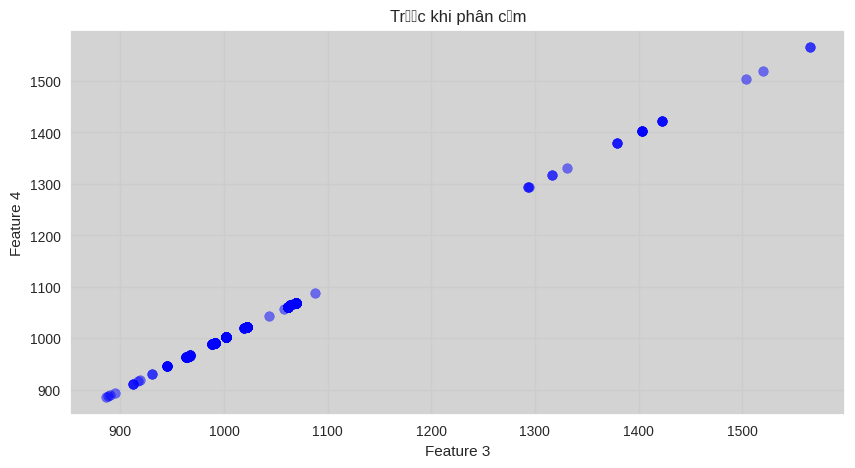

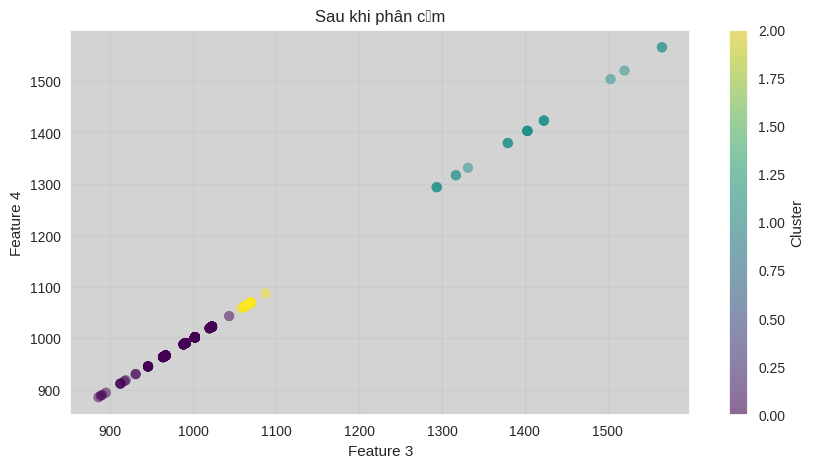

In [111]:
# Scatter plot before clustering
plt.figure(figsize=(10, 5))
plt.rcParams['axes.facecolor'] = '#d3d3d3'
plt.scatter(df['3'], df['4'], color='blue', alpha=0.5,  marker='o')
plt.title('Trước khi phân cụm')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.grid(True)


plt.show()


# Scatter plot after clustering
plt.figure(figsize=(10, 5))
plt.rcParams['axes.facecolor'] = '#d3d3d3'
plt.scatter(df['3'], df['4'], c=df['Clusters'], cmap='viridis', alpha=0.5, marker='o')
plt.title('Sau khi phân cụm')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7909 (\N{LATIN SMALL LETTER U WITH DOT BELOW}) missing from current font.



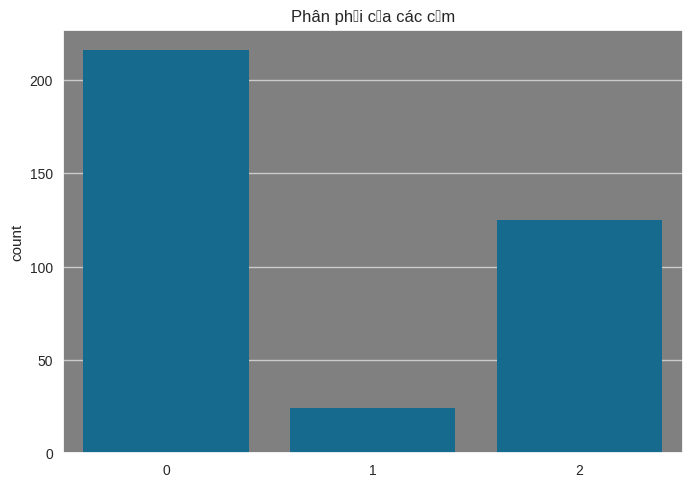

In [97]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

In [98]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [99]:
selected_cols = ['3', '4']
selected_cols.insert(0, df.columns[0])
selected_df = df[selected_cols]

In [100]:
# chuyển format ngày
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [101]:
# tạo số dữ liệu test bằng tháng 12
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

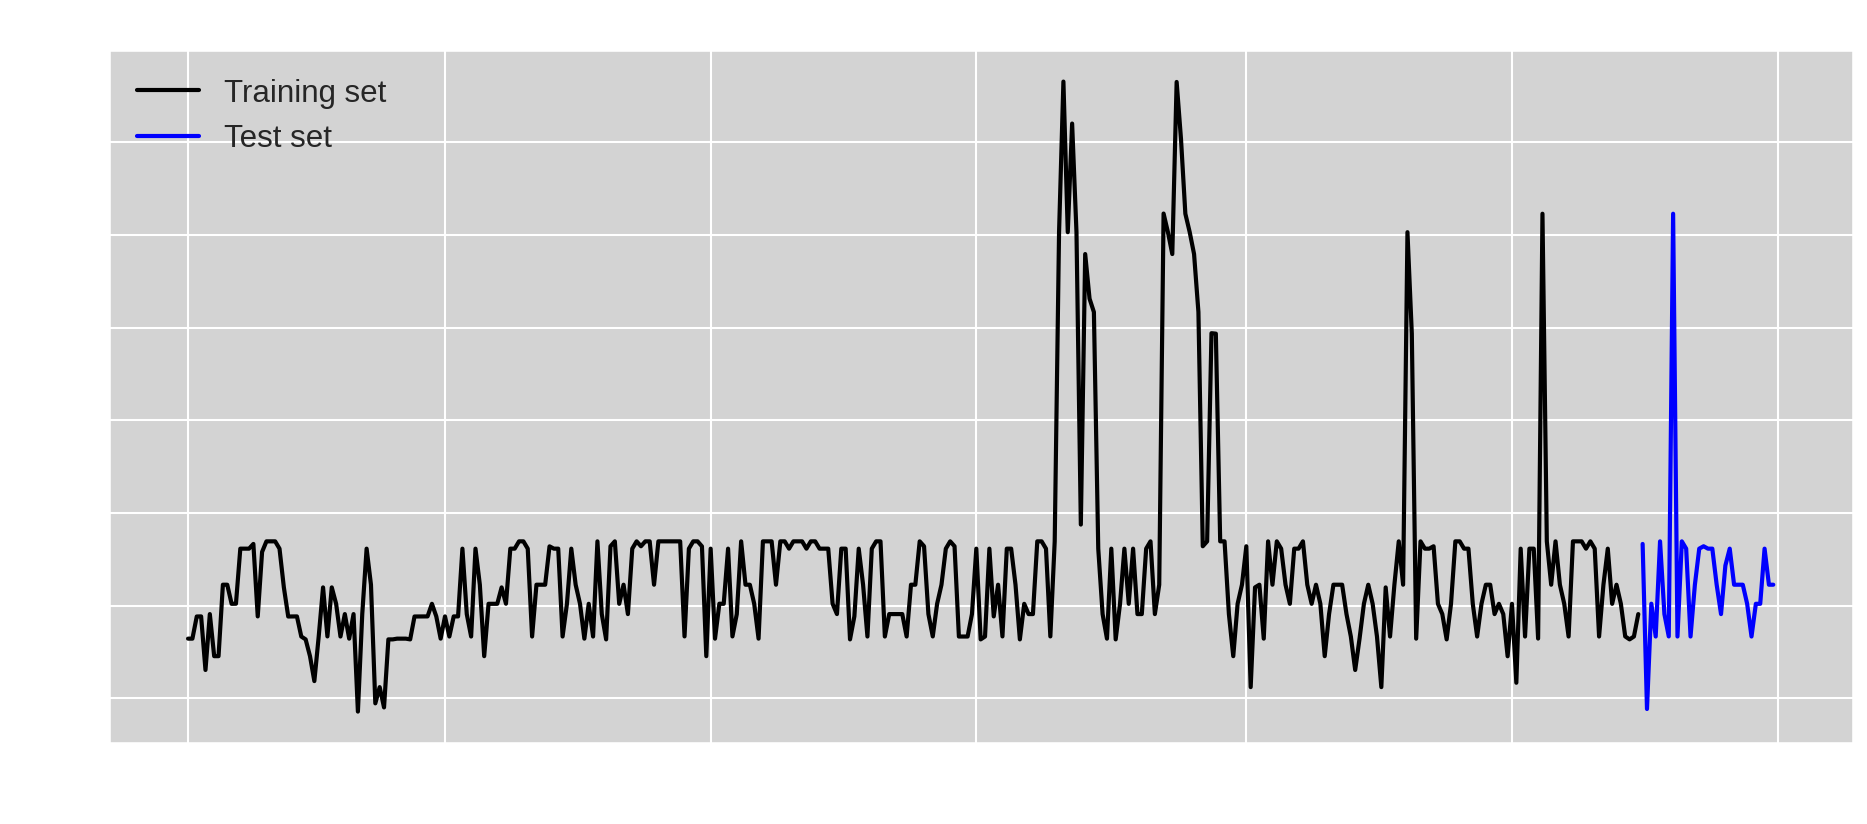

In [102]:
# Define the test size

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = '#d3d3d3'
plt.rc('axes', edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['1'][:-test_size], color='black', lw=2, label='Training set')
plt.plot(df['Ngày'][-test_size:], df['1'][-test_size:], color='blue', lw=2, label='Test set')
plt.title('1', fontsize=15, color='white')
plt.xlabel('Ngày', fontsize=12, color='white')
plt.ylabel('1', fontsize=12, color='white')
plt.legend(loc='upper left', prop={'size': 15})
plt.grid(color='white')

# Setting the tick colors
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df['1'].values.reshape(-1,1))

MinMaxScaler()

In [105]:
selected_cols = ['3', '4']
selected_cols.insert(0, df.columns[0])
selected_df = df[selected_cols]
selected_data=df[feats]

In [106]:
# Sử dụng MinMaxScaler để chuẩn hóa các cột đã chọn về khoảng 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=feats)
#print(scaled_df.head(20))
# Định nghĩa kích thước cửa sổ
window_size = 5

# Chuẩn bị dữ liệu huấn luyện
train_data = df['1'].values[:-window_size]
scaler.fit(train_data.reshape(-1, 1))
train_data_scaled = scaler.transform(train_data.reshape(-1, 1))

# Hàm để tạo dữ liệu cửa sổ
def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Tạo dữ liệu huấn luyện với cửa sổ
X_train, y_train = create_windowed_dataset(train_data_scaled, window_size)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (355, 5, 1)
y_train shape: (355, 1)


**LSTM**

In [108]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

         3       4
0    964.4   964.4
1    964.4   964.4
2    988.3   988.3
3    988.4   988.4
4    930.6   930.6
5    990.9   990.9
6    945.5   945.5
7    945.5   945.5
8   1022.6  1022.6
9   1022.6  1022.6
10  1002.0  1002.0
11  1002.1  1002.1
12  1061.5  1061.5
13  1061.5  1061.5
14  1061.5  1061.5
15  1066.6  1066.6
16   988.4   988.4
17  1058.0  1058.0
18  1069.4  1069.4
19  1069.4  1069.4
           3         4
0   0.115769  0.115769
1   0.115769  0.115769
2   0.150927  0.150927
3   0.151074  0.151074
4   0.066049  0.066049
5   0.154751  0.154751
6   0.087967  0.087967
7   0.087967  0.087967
8   0.201383  0.201383
9   0.201383  0.201383
10  0.171080  0.171080
11  0.171227  0.171227
12  0.258605  0.258605
13  0.258605  0.258605
14  0.258605  0.258605
15  0.266108  0.266108
16  0.151074  0.151074
17  0.253457  0.253457
18  0.270227  0.270227
19  0.270227  0.270227
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                O

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7849 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND HOOK ABOVE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7871 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND ACUTE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7843 (\N{LATIN SMALL LETTER A WITH HOOK ABOVE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from current font.



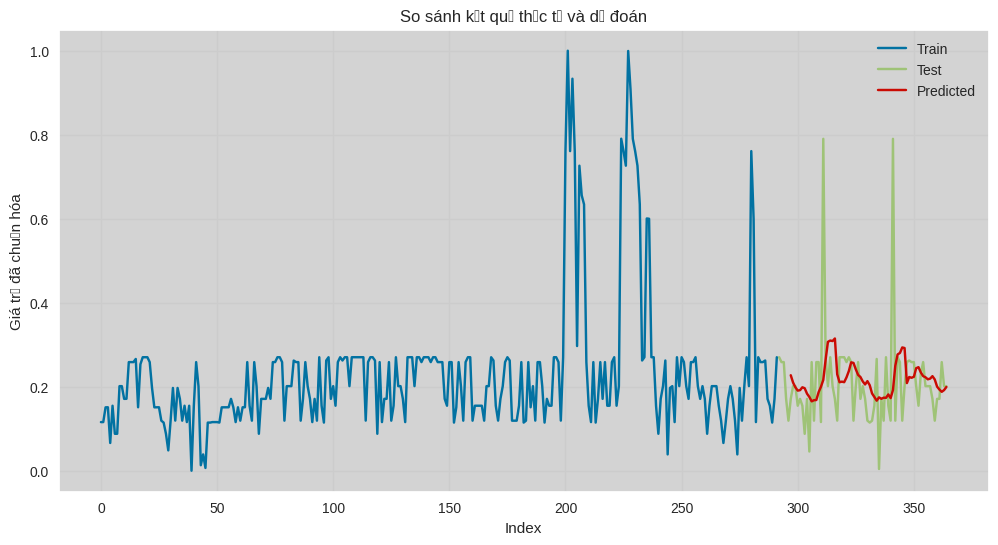

In [109]:
# Chọn các cột cần thiết
feats = ['3', '4']
selected_data = df[feats]
print(selected_data.head(20))

# Sử dụng MinMaxScaler để chuẩn hóa các cột đã chọn về khoảng 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=feats)
print(scaled_df.head(20))

# Chuẩn bị dữ liệu cho LSTM
window_size = 5

def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Chia dữ liệu thành train và test
split_ratio = 0.8
split_index = int(len(scaled_df) * split_ratio)
train_data = scaled_df.values[:split_index]
test_data = scaled_df.values[split_index:]

# Tạo dữ liệu train và test theo cửa sổ thời gian
X_train, y_train = create_windowed_dataset(train_data, window_size)
X_test, y_test = create_windowed_dataset(test_data, window_size)

# Thay đổi hình dạng của dữ liệu để phù hợp với LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Dự đoán trên dữ liệu test
predictions = model.predict(X_test)

# Vẽ biểu đồ so sánh kết quả thực tế và dự đoán
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_data)), train_data[:, 0], label='Train')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data[:, 0], label='Test')
plt.plot(range(len(train_data) + window_size, len(train_data) + window_size + len(predictions)), predictions[:, 0], label='Predicted')
plt.title('So sánh kết quả thực tế và dự đoán')
plt.xlabel('Index')
plt.ylabel('Giá trị đã chuẩn hóa')
plt.legend()
plt.show()